**Import libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/IPL Player Stats - 2016 till 2019.csv')

# Take a look at the first few rows of the data
print(data.head())

               Team     Player Tournament  Matches Batting Innings Not Out  \
0  Delhi Daredevils  CH Morris   IPL 2016       12               7       4   
1  Delhi Daredevils  CH Morris   IPL 2017        9               9       4   
2  Delhi Daredevils  CH Morris   IPL 2018        4               4       3   
3  Delhi Daredevils  JP Duminy   IPL 2016       10               8       3   
4  Delhi Daredevils  Q de Kock   IPL 2016       13              13       1   

  Runds Scored Highest Score Batting Average Balls Faced  ... Runs Conceded  \
0          195           82*           65.00         109  ...           308   
1          154           52*           30.80          94  ...           240   
2           46           27*           46.00          26  ...           143   
3          191           49*           38.20         156  ...            55   
4          445           108           37.08         327  ...             -   

  Wickets Taken Best Bowling Figures Bowling Average Bow

Data Cleaning: Convert relevant columns to numeric

In [5]:

data['Runs Scored'] = pd.to_numeric(data['Runds Scored'], errors='coerce')
data['Matches'] = pd.to_numeric(data['Matches'], errors='coerce')

# Visualization 1: Total Runs Scored by Players

<ipython-input-23-34ec25841c16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.index, y=top_players.values, palette='viridis')


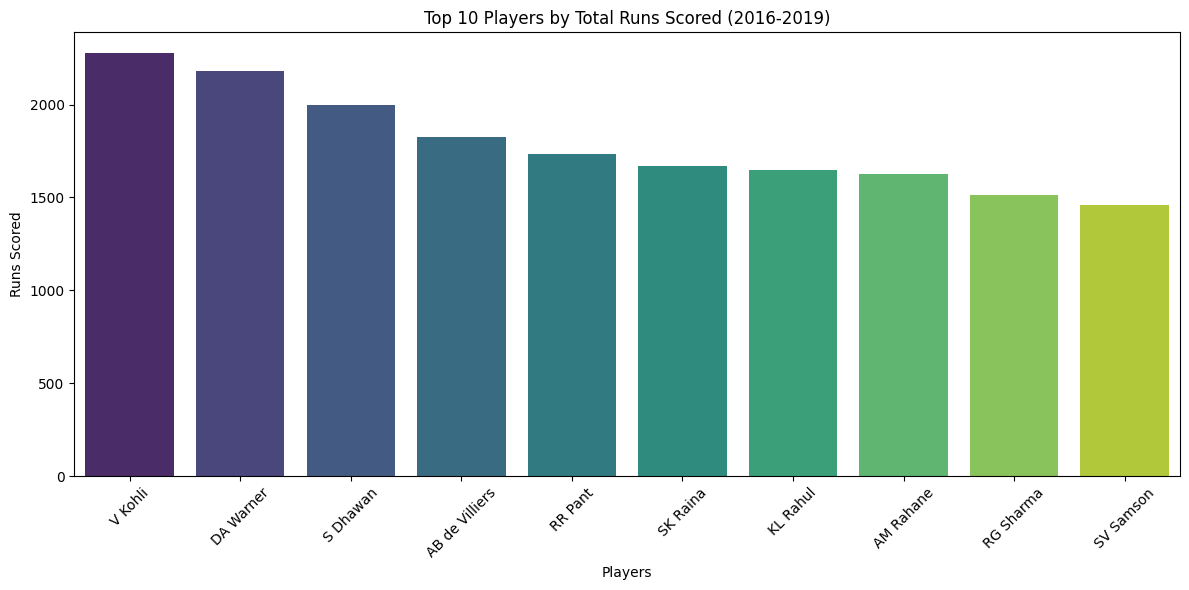

In [23]:

plt.figure(figsize=(12, 6))
top_players = data.groupby('Player')['Runs Scored'].sum().nlargest(10)
sns.barplot(x=top_players.index, y=top_players.values, palette='viridis')
plt.title('Top 10 Players by Total Runs Scored (2016-2019)')
plt.xlabel('Players')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Average Runs Scored per Match

<ipython-input-7-628804b9305a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_runs.index, y=average_runs.values, palette='magma')


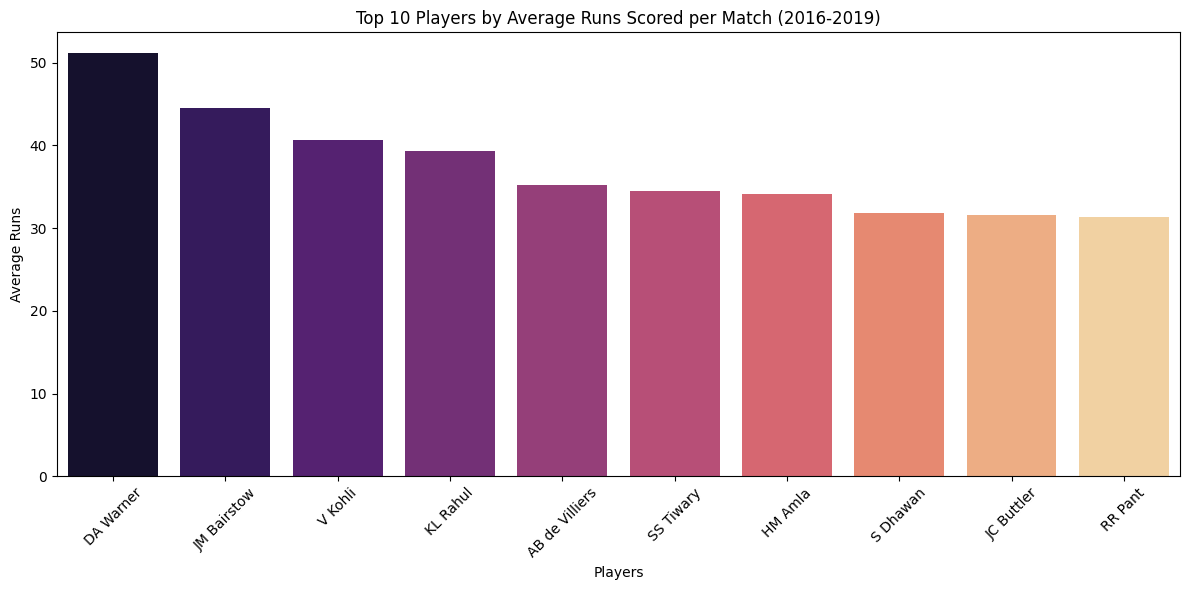

In [7]:

plt.figure(figsize=(12, 6))
data['Average Runs'] = data['Runs Scored'] / data['Matches']
average_runs = data.groupby('Player')['Average Runs'].mean().nlargest(10)
sns.barplot(x=average_runs.index, y=average_runs.values, palette='magma')
plt.title('Top 10 Players by Average Runs Scored per Match (2016-2019)')
plt.xlabel('Players')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Strike Rate Distribution

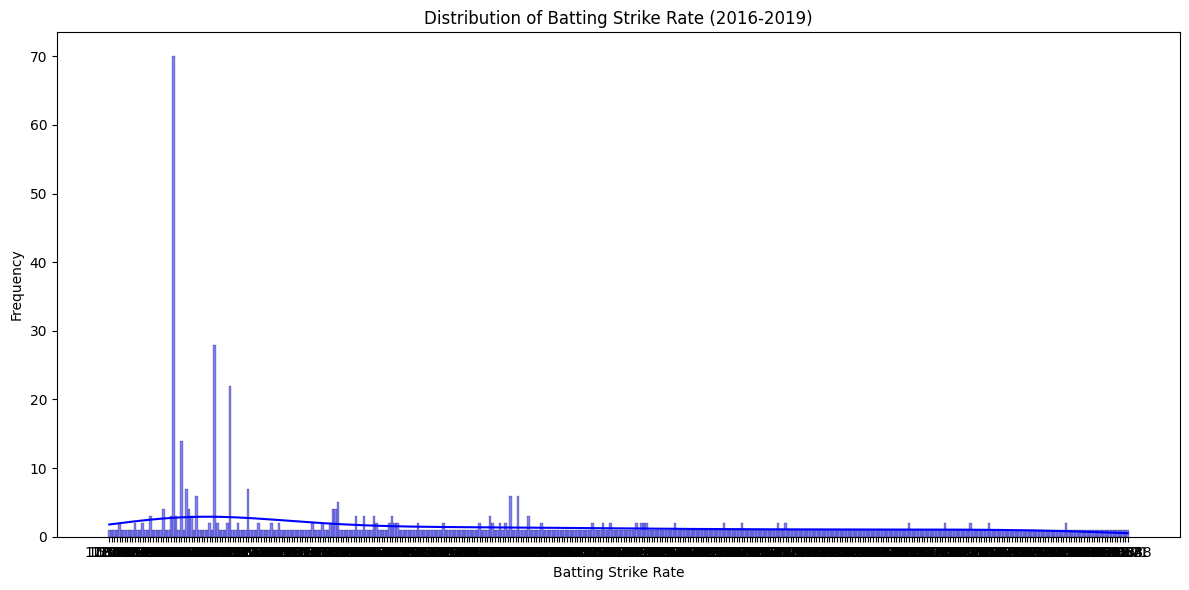

In [18]:

plt.figure(figsize=(12, 6))
sns.histplot(data['Batting Strike Rate'], bins=10, kde=True, color='blue')
plt.title('Distribution of Batting Strike Rate (2016-2019)')
plt.xlabel('Batting Strike Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization 4: Runs Scored Over Seasons

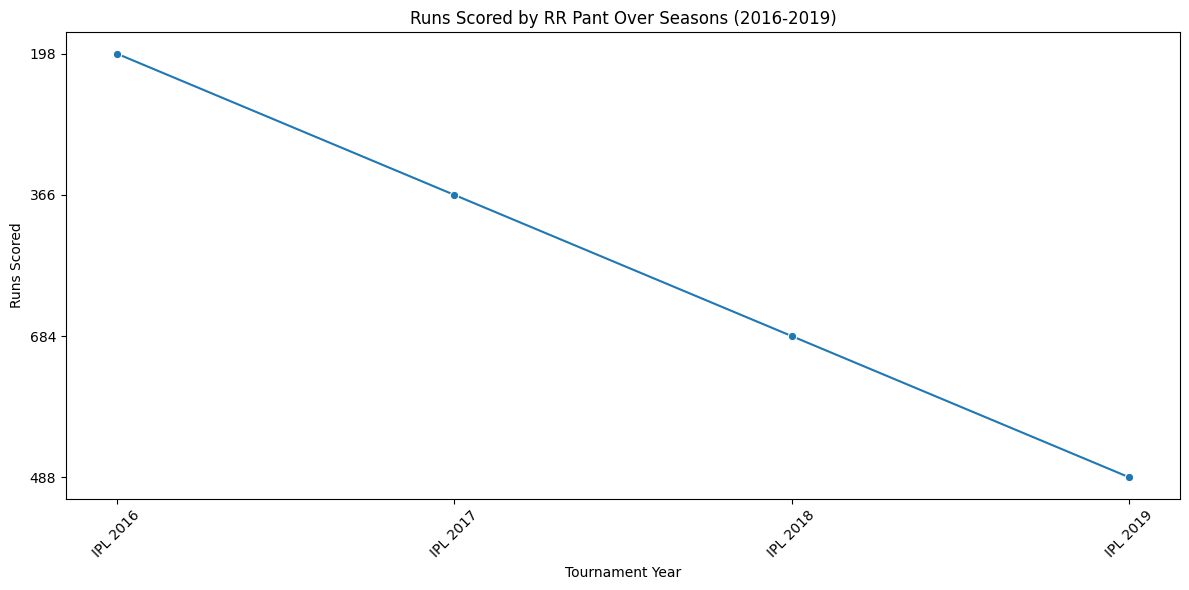

In [9]:

plt.figure(figsize=(12, 6))
player_name = 'RR Pant'  # Change this to visualize different players
player_data = data[data['Player'] == player_name]
sns.lineplot(x='Tournament', y='Runds Scored', data=player_data, marker='o')
plt.title(f'Runs Scored by {player_name} Over Seasons (2016-2019)')
plt.xlabel('Tournament Year')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 5: Players with Most Fours and Sixes

<ipython-input-14-b9d9d8f2c298>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fours_sixes.index, y=top_fours_sixes.values, palette='rocket')


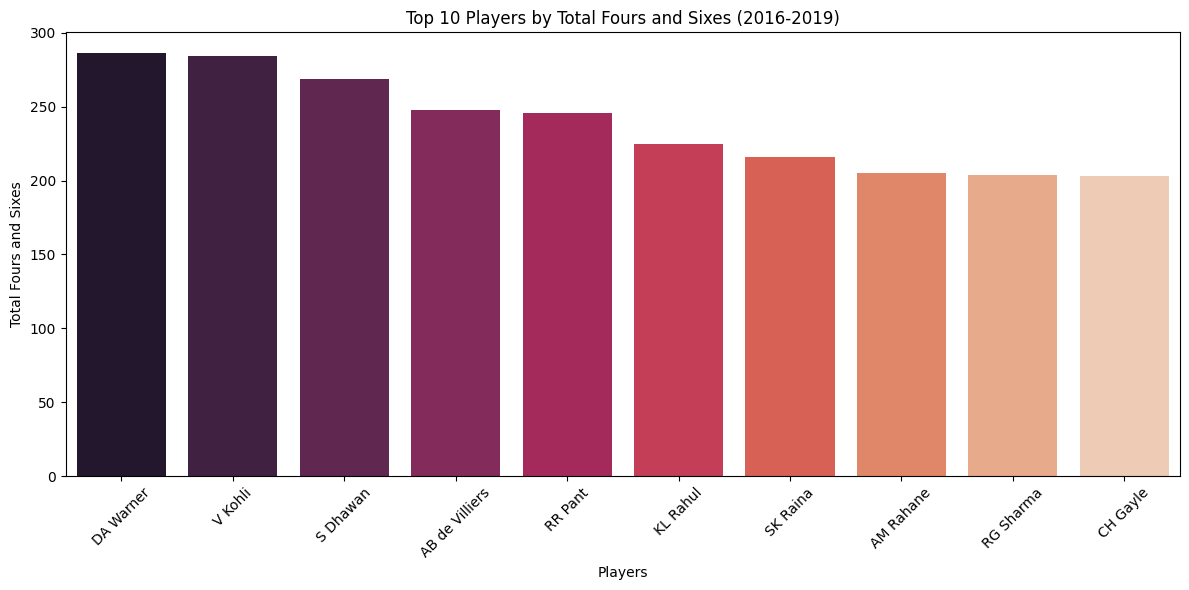

In [14]:

plt.figure(figsize=(12, 6))
data['Total Fours and Sixes'] = data['4s'] + data['6s']
top_fours_sixes = data.groupby('Player')['Total Fours and Sixes'].sum().nlargest(10)
sns.barplot(x=top_fours_sixes.index, y=top_fours_sixes.values, palette='rocket')
plt.title('Top 10 Players by Total Fours and Sixes (2016-2019)')
plt.xlabel('Players')
plt.ylabel('Total Fours and Sixes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualization 6: Top Wicket-Takers

<ipython-input-16-cf998e080c9d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette='coolwarm')


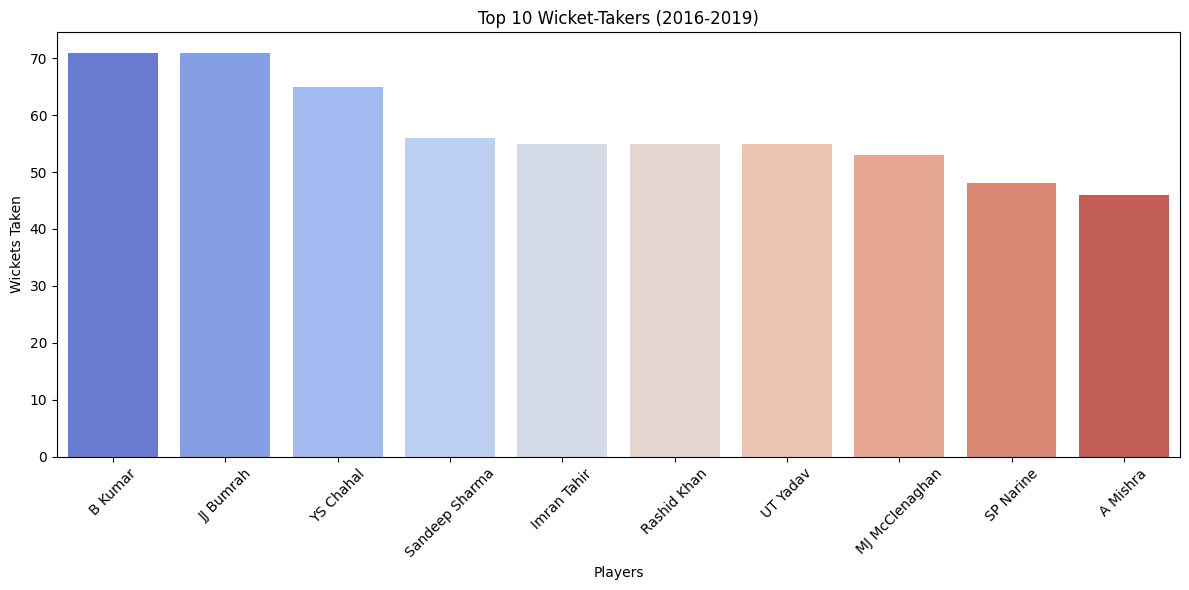

In [16]:

# Data Cleaning: Convert relevant columns to numeric
data['Wickets Taken'] = pd.to_numeric(data['Wickets Taken'], errors='coerce')

# Visualization 6: Top Wicket-Takers
plt.figure(figsize=(12, 6))
top_wicket_takers = data.groupby('Player')['Wickets Taken'].sum().nlargest(10)
sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette='coolwarm')
plt.title('Top 10 Wicket-Takers (2016-2019)')
plt.xlabel('Players')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 7: Best Bowling Figures

<ipython-input-21-50f2de282e40>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowling_figures.index, y=top_bowling_figures.values, palette='viridis')


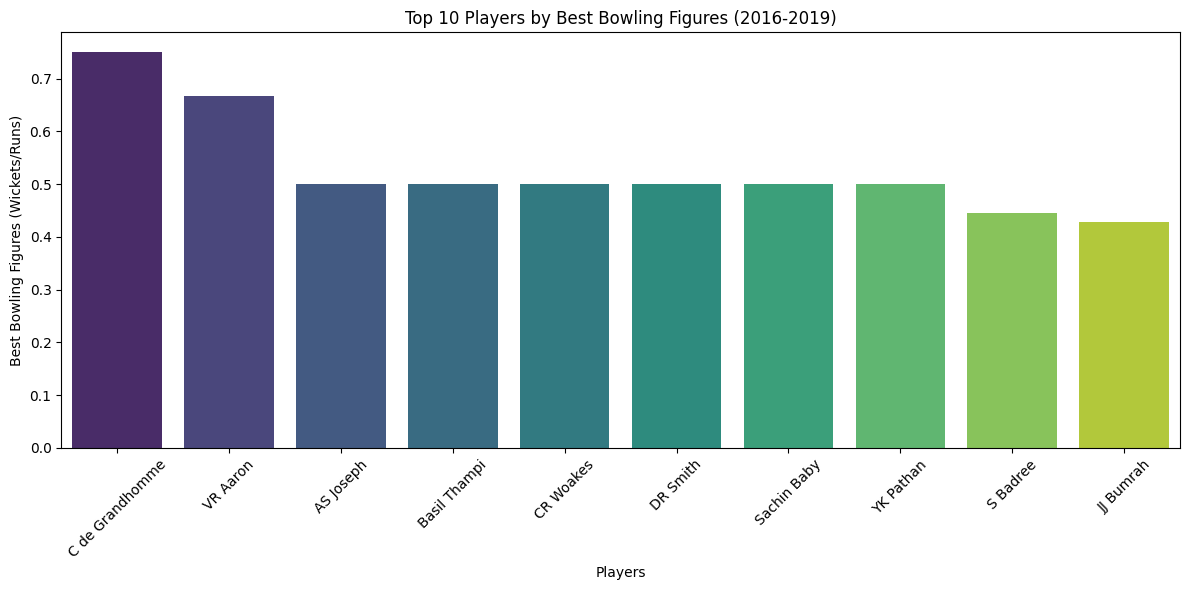

In [21]:
# Data Cleaning: Convert 'Best Bowling Figures' to numeric
def convert_bowling_figures(bowling_figures):
    try:
        wickets, runs = map(int, bowling_figures.split('/'))
        return wickets / runs if runs > 0 else 0  # Avoid division by zero
    except ValueError:
        return 0  # Return 0 for any malformed entries

data['Best Bowling Figures'] = data['Best Bowling Figures'].apply(convert_bowling_figures)

# Visualization 7: Best Bowling Figures
plt.figure(figsize=(12, 6))
top_bowling_figures = data.groupby('Player')['Best Bowling Figures'].max().nlargest(10)
sns.barplot(x=top_bowling_figures.index, y=top_bowling_figures.values, palette='viridis')
plt.title('Top 10 Players by Best Bowling Figures (2016-2019)')
plt.xlabel('Players')
plt.ylabel('Best Bowling Figures (Wickets/Runs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()